In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.patches as mpatches
import time

In [ ]:
df = pd.read_csv('/content/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
df.describe

<bound method NDFrame.describe of             Time         V1         V2        V3        V4        V5  \
0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
...          ...        ...        ...       ...       ...       ...   
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9  ...       V21       V22  \
0       0.462388  0.239599

In [ ]:
# Good No Null Values!
df.isnull().sum().max()

0

In [ ]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

Text(0.5, 1.0, 'Class Distributions \n (0: No Fraud || 1: Fraud)')

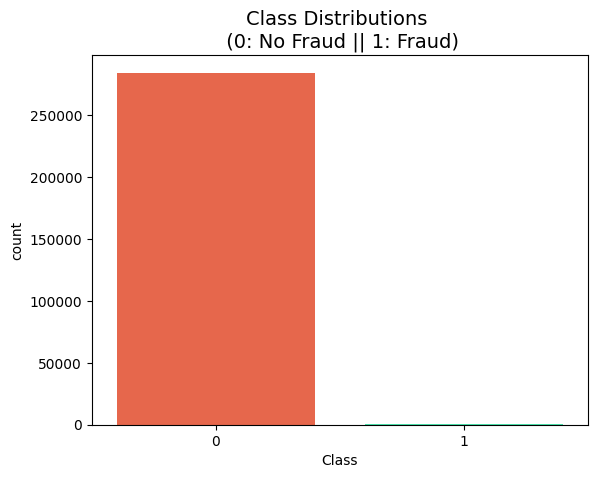

In [ ]:
colors = ["#FF5733", "#33FFB5"]
sns.countplot(x='Class', data=df, palette=colors)
plt.title('Class Distributions \n (0: No Fraud || 1: Fraud)', fontsize=14)


In [ ]:
# Since most of our data has already been scaled we should scale the columns that are left to scale (Amount and Time)
from sklearn.preprocessing import StandardScaler, RobustScaler

# RobustScaler is less prone to outliers.

std_scaler = StandardScaler()
rob_scaler = RobustScaler()

df['scaled_amount'] = rob_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['scaled_time'] = rob_scaler.fit_transform(df['Time'].values.reshape(-1,1))

df.drop(['Time','Amount'], axis=1, inplace=True)

In [ ]:
scaled_amount = df['scaled_amount']
scaled_time = df['scaled_time']

df.drop(['scaled_amount', 'scaled_time'], axis=1, inplace=True)
df.insert(0, 'scaled_amount', scaled_amount)
df.insert(1, 'scaled_time', scaled_time)

# Amount and Time are Scaled!

df.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,1.783274,-0.994983,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.269825,-0.994983,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,4.983721,-0.994972,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,1.418291,-0.994972,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,0.670579,-0.994960,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


In [ ]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Separate the features and the target variable
X = df.drop('Class', axis=1)
y = df['Class']

# Split the data into train and test sets using stratified sampling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Print the class distribution in the train and test sets
print('\nTrain set class distribution:')
print(y_train.value_counts(normalize=True))
print('\nTest set class distribution:')
print(y_test.value_counts(normalize=True))

# Apply SMOTE to the train set
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Print the number of instances before outlier removal
n_instances_before = len(X_train_resampled)
print('Number of instances before outlier removal:', n_instances_before)

# Print the class distribution in the resampled train set
print('\nResampled train set class distribution:')
print(y_train_resampled.value_counts(normalize=True))



Train set class distribution:
0    0.998271
1    0.001729
Name: Class, dtype: float64

Test set class distribution:
0    0.99828
1    0.00172
Name: Class, dtype: float64
Number of instances before outlier removal: 454902

Resampled train set class distribution:
0    0.5
1    0.5
Name: Class, dtype: float64


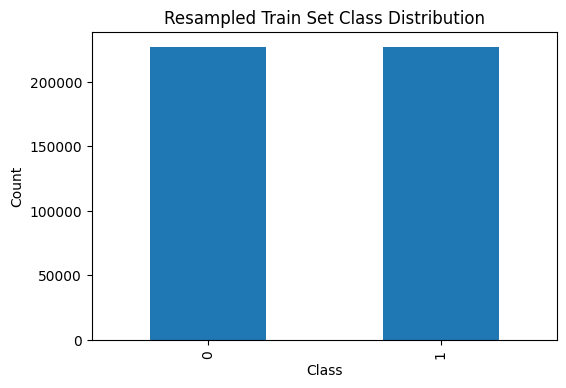

In [ ]:
import matplotlib.pyplot as plt

# Visualize the class distribution in the resampled train set
fig, ax = plt.subplots(figsize=(6, 4))
y_train_resampled_series = pd.Series(y_train_resampled)
y_train_resampled_series.value_counts().plot(kind='bar', ax=ax)
ax.set_title('Resampled Train Set Class Distribution')
ax.set_xlabel('Class')
ax.set_ylabel('Count')
plt.show()


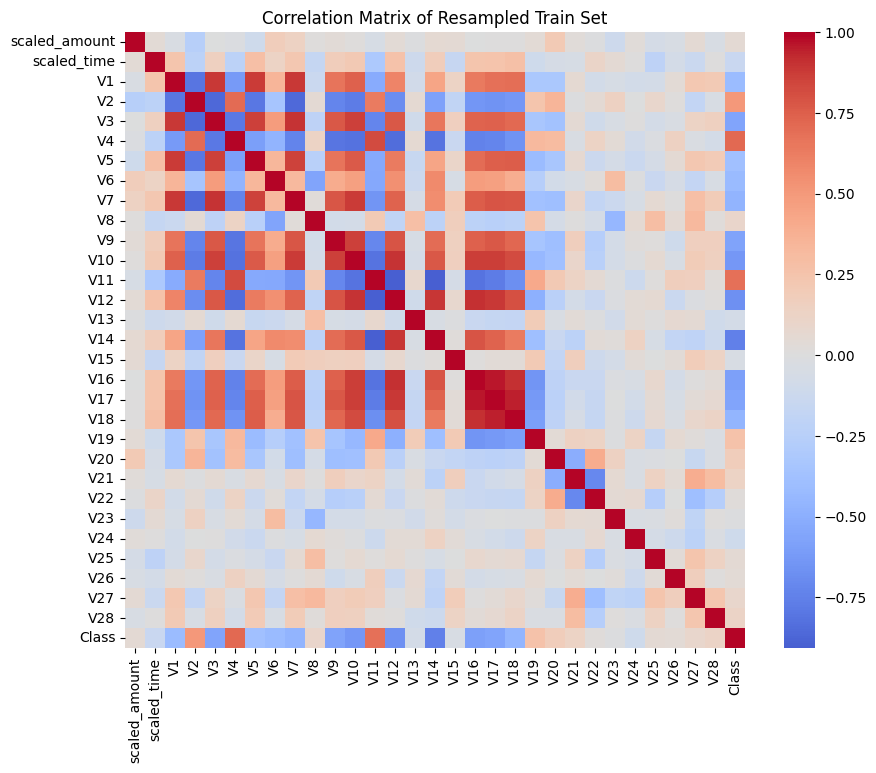

In [ ]:
import seaborn as sns

# Convert the resampled train set to a pandas dataframe
X_train_resampled_df = pd.DataFrame(X_train_resampled, columns=X.columns)
y_train_resampled_series = pd.Series(y_train_resampled)

# Concatenate X_train_resampled_df and y_train_resampled_series
train_resampled_df = pd.concat([X_train_resampled_df, y_train_resampled_series], axis=1)

# Compute the correlation matrix
corr_matrix = train_resampled_df.corr()

# Visualize the correlation matrix using a heatmap
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr_matrix, cmap='coolwarm', center=0, ax=ax)
ax.set_title('Correlation Matrix of Resampled Train Set')
plt.show()


In [ ]:
# Define the list of features to consider for outlier removal
features = ['V1','V3','V5', 'V6', 'V7', 'V9', 'V10', 'V12', 'V14', 'V16', 'V17','V18']

# Convert the resampled train set to a pandas dataframe
df_resampled = pd.concat([pd.DataFrame(X_train_resampled), pd.DataFrame(y_train_resampled, columns=['Class'])], axis=1)

# Identify and remove the outliers for the selected features in the resampled train set
df_resampled_clean = df_resampled.copy()
for feature in features:
    Q1 = df_resampled_clean[feature].quantile(0.25)
    Q3 = df_resampled_clean[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = (df_resampled_clean[feature] < lower_bound) | (df_resampled_clean[feature] > upper_bound)
    df_resampled_clean = df_resampled_clean[~outliers]

# Count the number of instances after outlier removal
n_instances = len(df_resampled_clean)
print('Number of instances after outlier removal:', n_instances)

# Count the number of outliers for each feature in fraud cases
fraud_cases = df_resampled_clean[df_resampled_clean['Class'] == 1]
for feature in features:
    Q1 = fraud_cases[feature].quantile(0.25)
    Q3 = fraud_cases[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    n_outliers = ((fraud_cases[feature] < lower_bound) | (fraud_cases[feature] > upper_bound)).sum()
    print('Feature', feature, 'Outliers for Fraud Cases:', n_outliers)


Number of instances after outlier removal: 231541
Feature V1 Outliers for Fraud Cases: 608
Feature V3 Outliers for Fraud Cases: 123
Feature V5 Outliers for Fraud Cases: 2069
Feature V6 Outliers for Fraud Cases: 759
Feature V7 Outliers for Fraud Cases: 2616
Feature V9 Outliers for Fraud Cases: 298
Feature V10 Outliers for Fraud Cases: 4121
Feature V12 Outliers for Fraud Cases: 4922
Feature V14 Outliers for Fraud Cases: 3148
Feature V16 Outliers for Fraud Cases: 275
Feature V17 Outliers for Fraud Cases: 735
Feature V18 Outliers for Fraud Cases: 38


In [ ]:
New_X = df_resampled_clean.drop('Class', axis=1)
New_y = df_resampled_clean['Class']

In [ ]:
df_resampled_clean.head

<bound method NDFrame.head of         scaled_amount  scaled_time        V1        V2        V3        V4  \
2            2.139314    -0.511061 -0.991920  0.603193  0.711976 -0.992425   
3           -0.222176     0.563118  2.285718 -1.500239 -0.747565 -1.668119   
4            0.895689    -0.297619 -0.448747 -1.011440  0.115903 -3.454854   
5            1.443303    -0.062125  1.320449 -1.560991 -0.154324 -1.806184   
6           -0.286313     0.319694  1.902180  0.158704 -0.210092  3.459251   
...               ...          ...       ...       ...       ...       ...   
454868      -0.112774     0.786560  1.848280  0.939738 -1.535176  4.007324   
454877      -0.186439    -0.356920 -0.468076  1.040120  0.646768  0.750950   
454883       0.112822     0.576085  1.748863  0.277344 -1.959409  0.512371   
454898       3.801861    -0.241478 -0.783079 -0.245036  1.141025  1.224935   
454899       0.076187     0.883517 -1.553010  2.075919 -3.130621  2.221775   

              V5        V6       

In [ ]:
# Split the resampled and cleaned data into train and test sets
#X_trainS, X_testS, y_trainS, y_testS = train_test_split(New_X, New_y, test_size=0.2, random_state=42, stratify=New_y)

# Fit a logistic regression model on the train set
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(random_state=42,max_iter=1000,solver='liblinear')
log_reg.fit(New_X, New_y)

# Evaluate the performance of the model on the test set
from sklearn.metrics import classification_report
y_pred = log_reg.predict(X_test)
print('Logistic Regression')
print(classification_report(y_test, y_pred))


Logistic Regression
              precision    recall  f1-score   support

           0       1.00      0.96      0.98     56864
           1       0.03      0.92      0.07        98

    accuracy                           0.96     56962
   macro avg       0.52      0.94      0.52     56962
weighted avg       1.00      0.96      0.98     56962



In [ ]:
# Train your classifier (example: RandomForestClassifier)
from sklearn.neighbors import KNeighborsClassifier
# Create a KNN classifier with k=3
knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(New_X, New_y)

# Make predictions on the test set
y_pred = knn.predict(X_test)

print('KNeighorsClassifier')
print(classification_report(y_test,y_pred))

KNeighorsClassifier
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.28      0.81      0.42        98

    accuracy                           1.00     56962
   macro avg       0.64      0.90      0.71     56962
weighted avg       1.00      1.00      1.00     56962



In [ ]:
# Train your classifier (example: RandomForestClassifier)
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=42)
clf.fit(New_X, New_y)

# Make predictions on the test set
y_pred = clf.predict(X_test)
print('RandomForestClassifier')
print(classification_report(y_test,y_pred))

RandomForestClassifier
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.81      0.72      0.76        98

    accuracy                           1.00     56962
   macro avg       0.90      0.86      0.88     56962
weighted avg       1.00      1.00      1.00     56962



In [ ]:
# Train your classifier (example:SVC)
from sklearn.svm import SVC
clf = SVC(random_state=42)
clf.fit(New_X, New_y)

# Make predictions on the test set
y_pred = clf.predict(X_test)

print('SVC')
print(classification_report(y_test,y_pred))

SVC
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.03      0.04      0.04        98

    accuracy                           1.00     56962
   macro avg       0.51      0.52      0.52     56962
weighted avg       1.00      1.00      1.00     56962

